In [1]:
import numpy as np
from scipy import optimize
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from tabulate import tabulate
from matplotlib import pyplot as plt
from  sklearn.metrics import r2_score
#------------------------------------
#  German Hernández/Código:2171842.
#-----------------------------------

## Etapas ideales para absorción solo para ley de Henry y Raoult ##

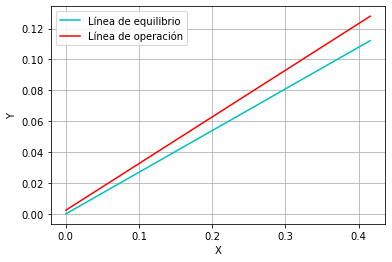

╒════════════╤════════════╕
│         Xn │         Yn │
╞════════════╪════════════╡
│ 0          │ 0.0024     │
├────────────┼────────────┤
│ 0.00895501 │ 0.00510441 │
├────────────┼────────────┤
│ 0.0191872  │ 0.00819455 │
├────────────┼────────────┤
│ 0.0310664  │ 0.0117821  │
├────────────┼────────────┤
│ 0.0451152  │ 0.0160248  │
├────────────┼────────────┤
│ 0.0620978  │ 0.0211535  │
├────────────┼────────────┤
│ 0.0831795  │ 0.0275202  │
├────────────┼────────────┤
│ 0.11023    │ 0.0356893  │
├────────────┼────────────┤
│ 0.14645    │ 0.0466278  │
├────────────┼────────────┤
│ 0.197819   │ 0.0621412  │
├────────────┼────────────┤
│ 0.276945   │ 0.0860375  │
├────────────┼────────────┤
│ 0.415779   │ 0.127965   │
╘════════════╧════════════╛
El número de platos ideales requeridos es :


11

In [2]:
#Función que calcula el numero de etapas para absorción a contracorriente
#Equilibrio dado por la ley de Henry
def N_ABSH(Xa,Xb,Yb,LG,H,P):
    m=H/P 
    i=0
    X=np.zeros(50)
    x=np.zeros(50)
    y=np.zeros(50)
    Y=np.zeros(50)
    X[i]=Xb
    x[i]=Xb
    Y[i]=Yb
    y[i]=Y[i]/(1+Y[i])
    N=[]
    while X[i]<Xa:
        x[i+1]=y[i]/m
        X[i+1]=x[i+1]/(1-x[i+1])
        Y[i+1]=Y[i]-LG*(X[i]-X[i+1])
        y[i+1]=Y[i+1]/(1+Y[i+1])
        i=i+1
        N.append(i)    
    N=np.asarray(N)
    VX=X[0:i+1]
    VY=Y[0:i+1]
    plt.plot(VX,VX*m,"c-",label="Línea de equilibrio")
    plt.plot(VX,VY,"r-",label="Línea de operación")
    #plt.plot(VX[6],VY[6],"co")
    #plt.plot(VX[6],VX[6]*m,"ro")
    plt.legend(loc="best")
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    Datos=np.transpose([VX,VY])
    Encabezados=["Xn","Yn"]
    print(tabulate(Datos,headers=Encabezados,tablefmt="fancy_grid",stralign="center"))
    print('El número de platos ideales requeridos es :')
    return i
N_ABSH(0.28,0,0.0024,0.302,41/101.325,1.5)

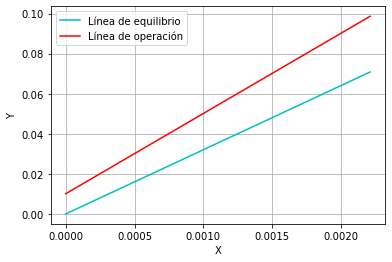

╒═════════════╤═══════════╕
│          Xn │        Yn │
╞═════════════╪═══════════╡
│ 0           │ 0.010101  │
├─────────────┼───────────┤
│ 0.000312598 │ 0.0226049 │
├─────────────┼───────────┤
│ 0.000691266 │ 0.0377516 │
├─────────────┼───────────┤
│ 0.00113812  │ 0.0556256 │
├─────────────┼───────────┤
│ 0.00164942  │ 0.0760778 │
├─────────────┼───────────┤
│ 0.00221424  │ 0.0986706 │
╘═════════════╧═══════════╛
El número de platos ideales requeridos es :


5

In [3]:
N_ABSH(0.002,0,0.01/(1-0.01),40,32,1)

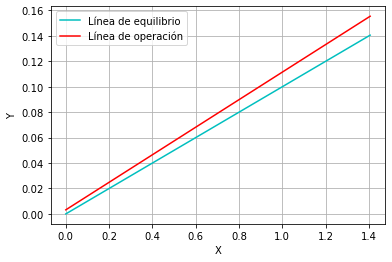

╒═══════════╤════════════╕
│        Xn │         Yn │
╞═══════════╪════════════╡
│ 0         │ 0.0032     │
├───────────┼────────────┤
│ 0.0329489 │ 0.00676837 │
├───────────┼────────────┤
│ 0.0720741 │ 0.0110056  │
├───────────┼────────────┤
│ 0.122156  │ 0.0164295  │
├───────────┼────────────┤
│ 0.192804  │ 0.0240807  │
├───────────┼────────────┤
│ 0.307436  │ 0.0364953  │
├───────────┼────────────┤
│ 0.543455  │ 0.0620562  │
├───────────┼────────────┤
│ 1.40559   │ 0.155426   │
╘═══════════╧════════════╛
El número de platos ideales requeridos es :


7

In [4]:
#Función que calcula el numero de etapas para absorción a contracorriente
#Equilibrio dado por la ley de Raoult
def N_ABSR(Xa,Xb,Yb,LG,Ps,P):
    m=Ps/P 
    i=0
    X=np.zeros(50)
    x=np.zeros(50)
    y=np.zeros(50)
    Y=np.zeros(50)
    X[i]=Xb
    x[i]=Xb
    Y[i]=Yb
    y[i]=Y[i]/(1+Y[i])
    N=[]
    while X[i]<Xa:
        x[i+1]=y[i]/m
        X[i+1]=x[i+1]/(1-x[i+1])
        Y[i+1]=Y[i]-LG*(X[i]-X[i+1])
        y[i+1]=Y[i+1]/(1+Y[i+1])
        i=i+1
        N.append(i)    
    N=np.asarray(N)
    VX=X[0:i+1]
    VY=Y[0:i+1]
    plt.plot(VX,VX*m,"c-",label="Línea de equilibrio")
    plt.plot(VX,VY,"r-",label="Línea de operación")
    plt.legend(loc="best")
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    Datos=np.transpose([VX,VY])
    Encabezados=["Xn","Yn"]
    print(tabulate(Datos,headers=Encabezados,tablefmt="fancy_grid",stralign="center"))
    print('El número de platos ideales requeridos es :')
    return i
N_ABSR(0.56,0,0.0032,0.1083,76,760)

## Etapas ideales general ##

In [2]:
#FUNCION PARA EL CALCULO DEL NUMERO DE ETAPAS IDEALES GENERAL EN ABSORCION CC
#Se debe ingresar la función que representa el equilibrio en terminos de X (Y se agrega más abajo al despejar con solve)
def ABSET(Xa,Xb,Ya,Yb,Eq1,Eq2):
    #Xa=Xn valor en el fondo >
    #XB=X0 valor en el tope <
    #YB=Y1=Yn valor en el fondo <
    Yn=Yb
    LG=(Ya-Yb)/(Xa-Xb)
    #print(LG)
    Xn,Yn_1=sp.symbols("Xn,Yn_1")
    
    #Convertir la expresion str en una evaluable de sympy
    f1=parse_expr(Eq1)
    f2=parse_expr(Eq2)
    
    #Ecuación de equilibrio
    #Se resta Yn porque la función debe estar igualada a 0 
    Xn=sp.solve(f1-Yn,Xn)[0] ##-->Se debe hacer una regresión de los datos de equilibrio
    Yn_1=sp.solve(Yn-LG*(Xb-Xn)-Yn_1,Yn_1)[0]
    n=0
    N=[]
    vY=[]
    vY.append(Yn_1)
    vX=[]
    vX.append(Xn)
    while Xn<Xa:
        XN,YN_1=sp.symbols("XN,YN_1")
        XN=sp.solve(f2-Yn_1,XN)[0] #modificar
        YN_1=sp.solve(Yn_1-LG*(Xn-XN)-YN_1,YN_1)[0]
        Xn=XN
        Yn_1=YN_1
        n=n+1
        N.append(n)
        #print(Xn,Yn_1)    
        vY.append(Yn_1)
        vX.append(Xn)
    #print(vX,vY)
    #Calculo del porcentaje de etapa
    if Xn>Xa:
        P_et=(Ya-vY[len(vY)-2])/(vY[len(vY)-1]-vY[len(vY)-2])
        
    else:
        P_et=0
    #Table    
    Datos=np.transpose([vX,vY])
    Encabezados=["XNp","Yp+1"]
    print(tabulate(Datos,headers=Encabezados,tablefmt="fancy_grid",stralign="center"))			        
    print("%Etapa=",P_et)
    print()
    print("El número de etapas es:")        
    return n+P_et

In [11]:
#ABSET(Xa,Xb,Ya,Yb,Eq1,Eq2):
ABSET(0.60,0.024,0.117,0.0059,"1.4335*Xn**3 - 0.6838*Xn**2 + 0.0825*Xn","1.4335*XN**3 - 0.6838*XN**2 + 0.0825*XN")

╒══════════╤═══════════╕
│      XNp │      Yp+1 │
╞══════════╪═══════════╡
│ 0.34469  │ 0.0677553 │
├──────────┼───────────┤
│ 0.534701 │ 0.104405  │
├──────────┼───────────┤
│ 0.589157 │ 0.114909  │
├──────────┼───────────┤
│ 0.602382 │ 0.117459  │
╘══════════╧═══════════╛
%Etapa= 0.819881382662642

El número de etapas es:


3.81988138266264

In [3]:
v=sp.symbols("v")
#sp.solve( 1.4335*v**3 - 0.6838*v**2 + 0.0825*v-0.117,v)
sp.solve( 1.5415*v**3 - 0.7718*v**2 + 0.098*v-0.117,v)



[0.603654031717055,
 -0.0514864384988131 - 0.350832694439788*I,
 -0.0514864384988131 + 0.350832694439788*I]

In [4]:
#Ejercicio de clase
ABSET(0.19,0.01,0.06,0.006,"0.2521*Xn","0.2521*XN")

╒═══════════╤═══════════╕
│       XNp │      Yp+1 │
╞═══════════╪═══════════╡
│ 0.0238001 │ 0.01014   │
├───────────┼───────────┤
│ 0.0402222 │ 0.0150667 │
├───────────┼───────────┤
│ 0.0597647 │ 0.0209294 │
├───────────┼───────────┤
│ 0.0830202 │ 0.0279061 │
├───────────┼───────────┤
│ 0.110694  │ 0.0362083 │
├───────────┼───────────┤
│ 0.143627  │ 0.0460881 │
├───────────┼───────────┤
│ 0.182817  │ 0.057845  │
├───────────┼───────────┤
│ 0.229452  │ 0.0718357 │
╘═══════════╧═══════════╛
%Etapa= 0.154032629546336

El número de etapas es:


7.15403262954634

In [3]:
#Ejemplo 6.12 pagina 37 pdf OCON-TOJO
ABSET(0.56,0,0.0638,0.0032,"0.0109*Xn**3 - 0.0493*Xn**2 + 0.0913*Xn","0.0109*XN**3 - 0.0493*XN**2 + 0.0913*XN") 

NameError: name 'ABSET' is not defined

In [ ]:
#ABSET(Xa,Xb,Ya,Yb,Eq1,Eq2):
#ABSET(0.188,0.0246,0.364,0.04998,"4.2623*Xn**2+0.4555*Xn","4.2623*XN**2+0.4555*XN")
#4.2641x2 + 0.4595x->con Webplotdigitizer 2.889

## Método de Kremser Absorción cc##

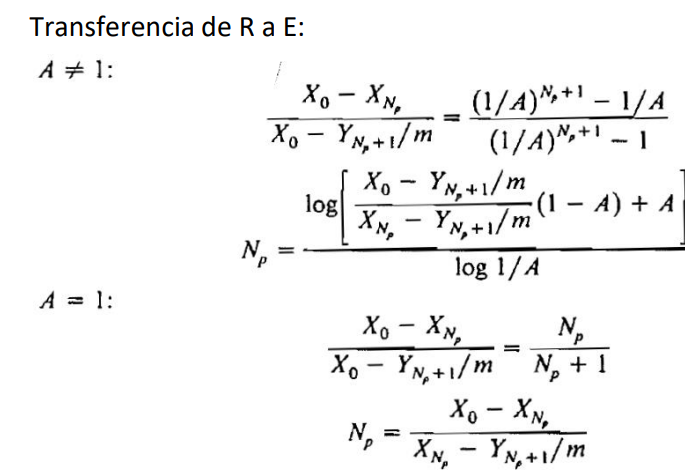

In [ ]:
def kremser_A(X0,XNP,YNP1,LG,m):
    A=LG/m #factor de absorción
    if A==1:
        Np=(X0-XNP)/(XNP-YNP1/m)
    else:
        Np=(np.log((((X0-YNP1/m)/(XNP-YNP1/m))*(1-A))+A))/(np.log(1/A))
    print("El número de etapas ideales es :")    
    return Np
kremser_A(0.01,0.19,0.06,0.3,0.2521)

In [ ]:
#LG=(0.0309-(0.05/100))/(0.1043)=0.291466
#kremser_A(0,0.1043,0.0309,0.291466,0.185)
kremser_A(0,0.008527,0.0309,3.515,1.75)

## Método de Kremser Desorción etapa ideal cc ##

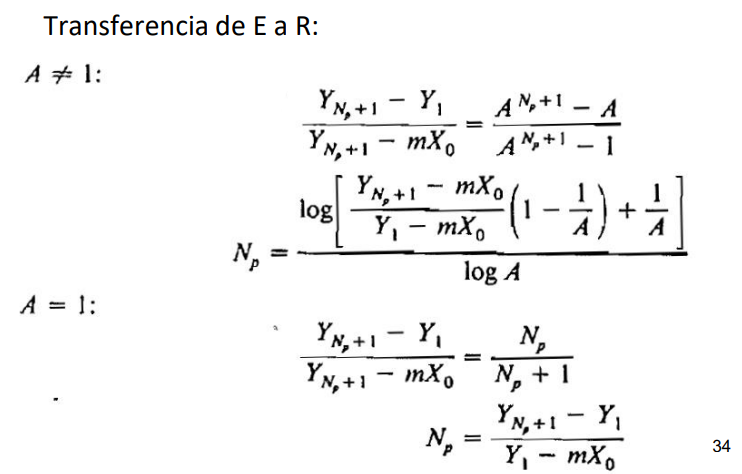

In [ ]:
def kremser_D(X0,Y1,YNP1,LG,m):
    A=LG/m
    S=1/A #factor de desorción
    if A==1:
        Np=(YNP1-Y1)/(Y1-m*X0)
    else:
        Np=(np.log((((YNP1-m*X0)/(Y1-m*X0))*(1-S))+S))/(np.log(A))
    print("El número de etapas ideales es :")    
    return Np

In [ ]:
kremser_D(2.308e-6,2.296e-4,0,2.11/0.0212,149.107)

In [ ]:
def DT(rhol,rhog,sigma,t,Lp,Gp):
    LGP=(Lp/Gp)*(rhog/rhol)**0.5
    if 0.01<LGP<0.1:
        LGP=0.1
    else:
        LGP=LGP
    a=0.0744*t+0.01173
    b=0.0304*t+0.015
    Cf=((a*np.log10(1/LGP))+b)*(sigma/0.02)**0.2
    Vf=Cf*((rhol-rhog)/rhog)**0.5
    Vop=0.8*Vf
    Q=Gp/rhog
    Aneta=Q/Vop
    At=Aneta/(1-0.088)
    D=((4*At)/np.pi)**0.5
    return LGP,Cf,Vf,Vop,Q,Aneta,At,D
#DT(1000,1.073,0.04,0.5,1.4735,1.09)
#DT(1000,1.24,0.04,0.5,3.05,1.4205)
DT(1095,1.175,0.04,0.6,3.27,2.983)